This notebook calcualte and plot total fire emissions over the IGP. 

In [1]:
# import modules
%run ../load_main.py

WRFchem outputs data path is: dpath=/geos/d21/s1878599/IGP


## Define functions

### Plot

In [2]:
#SPATIAL PLOT OVER IGP

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1.colorbar import colorbar
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.shapereader as shpreader

def set_formatter(axes):
    for ax in axes:
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                          linewidth=0.5, color='k', alpha=0.4, linestyle='-')
        gl.xlabels_top = False
        gl.xlabels_bottom = False
        gl.ylabels_right = False
        gl.ylabels_left = False
        gl.ylocator = mticker.FixedLocator([20,25,30,35])
        gl.xlocator = mticker.FixedLocator([70,80,90])
        
        ax.add_feature(cfeature.COASTLINE, lw=0.3)
        ax.add_feature(cfeature.BORDERS, lw=0.3)
        gl.xlabel_style = {'size': 10, 'color': 'grey'}
        gl.ylabel_style = {'size': 10, 'color': 'grey'}

     # get lon values only n the last ax
        if ax==axes[3]:
            gl.xlabels_bottom = True
    
    
def set_admin(axes, shp_path):
    for ax,shp in zip(axes,shp_path):
            admin = list(shpreader.Reader(shp).geometries())
            # Add data from Global Administrative Areas Dataset GDAM https://gadm.org/index.html
            ax.add_geometries(admin, ccrs.PlateCarree(),
                      edgecolor='black', facecolor='none', alpha=0.9, lw=0.3)
            
def emiplot(lat,lon,pmds,mds,ads,wds,panels=["(b)","(e)","(h)","(k)"], title=None, label=None, cmap="OrRd",vmax=None, vmin=0,levs=10, delta=None, 
            figsize=[7, 10],format="%.2f",save=False,spath=None,name="plot",savef='pdf', dpi=100):

    fig, axes =plt.subplots(nrows=4,ncols=1,figsize=figsize, subplot_kw={'projection': ccrs.PlateCarree()})
    
    igp_shp="/exports/csce/datastore/geos/users/s1878599/phd_work/IGP/gadm_data/IGP/IGP.shp"
    shp_path=(igp_shp,igp_shp,igp_shp,igp_shp)
    
    set_formatter(axes.flatten())
    set_admin(axes.flatten(), shp_path)
 
    #Getting values.
    vpm=pmds[0,:,:].values
    vm= mds[0,:,:].values
    va= ads[0,:,:].values 
    vw= wds[0,:,:].values
   
    import math # Get the max value in the array to plot.
    vmax_v =np.array([np.nanmax(vpm),np.nanmax(vm),np.nanmax(va),np.nanmax(vw)]).max()        
    vmin=vmin
    print(vmax,vmin)
    
    if vmax is None:
        levels = np.linspace(vmin, vmax_v,levs)  # number of levels for which divide the bar. Customised. 
    else:
        levels = np.linspace(vmin, vmax, levs)
    
    # premonsoon
    cspm=axes[0].contourf(lon,lat,vpm,transform=ccrs.PlateCarree(),cmap=cmap,levels=levels, extend="both")
    cspm.cmap.set_under('#FFFFFF')
    cspm.cmap.set_over('#FFFF00')
                                                 
    # monsoon
    csm=axes[1].contourf(lon,lat,vm,transform=ccrs.PlateCarree(),cmap=cmap,levels=levels, extend="both")
    csm.cmap.set_under('#FFFFFF')
    csm.cmap.set_over('#FFFF00')
    #autumn
    csa=axes[2].contourf(lon,lat,va,transform=ccrs.PlateCarree(),cmap=cmap,levels=levels, extend="both")
    csa.cmap.set_under('#FFFFFF')
    csa.cmap.set_over('#FFFF00')
    #winter
    csw=axes[3].contourf(lon,lat,vw,transform=ccrs.PlateCarree(),cmap=cmap,levels=levels, extend="both")
    csw.cmap.set_under('#FFFFFF')
    csw.cmap.set_over('#FFFF00')
    

    """
    axes[0].text(-0.2, 0.55, 'PRE-MONSOON', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor', fontsize=12,
        transform=axes[0].transAxes)
    axes[1].text(-0.2, 0.55, 'MONSOON', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor', fontsize=12,
        transform=axes[1].transAxes)
    axes[2].text(-0.2, 0.55, 'POST-MONSOON', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor', fontsize=12,
        transform=axes[2].transAxes)
    axes[3].text(-0.2, 0.55, 'WINTER', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor', fontsize=12,
        transform=axes[3].transAxes)
    """
    
    #add panel boxes
    panels=panels
    for ax,p in zip(fig.axes,panels):
        ax.annotate(p, xy=(1, 1), xytext=(-5, -5), fontsize=12,
        xycoords='axes fraction', textcoords='offset points',
        bbox=dict(facecolor='white',edgecolor='white', alpha=0.8),
        horizontalalignment='right', verticalalignment='top')
    
    
    #cbar
    cbar_ax = fig.add_axes([0.8, 0.15, 0.04, 0.7])  #[left, bottom, width, height]
    cbar= fig.colorbar(csw, cax=cbar_ax,pad=0.1,shrink=0.5, format=format)
    cbar.set_label(label,fontsize=13)
    cbar.ax.tick_params(labelsize='medium')
    
    

    #reshape spacing between ticks
    if delta is None:
            delta=vmax/10
            cbar.set_ticks([0.001,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
            cbar.set_ticklabels([0.001,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
    
    
    #title
    if title is not None:
        axes[0].set_title(title, fontsize=12,pad=20)
    
    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    
    #save
    if save:
        plt.savefig( spath + name +'.' + savef, format=savef, dpi=dpi,bbox_inches = "tight")
    
    
    fig.show()

### Emissions

The following functions convert emissons rates in emissons inputs(wrffirechemi, wrfchemi,wrfbiochemi) 
to total emissions for each gridpoint and for all domain. This is done for chemical mechanism MOZART-MOSAIC.
Molecular weights for each variable have been derived following the speciation described for the MOZART mechanism in 
Emmons, Louisa K., et al. "Description and evaluation of the Model for Ozone and Related chemical Tracers, version 4 (MOZART-4)." 
Geoscientific Model Development 3.1 (2010): 43-67 - (Table 2) and relevant updates in Knote, Christoph, et al. "Simulation of semi-explicit mechanisms of SOA formation from glyoxal in aerosol in a 3-D model." 
Atmospheric Chemistry and Physics 14.12 (2014): 6213-6239 (Table 1).

In [3]:
# CALCULATE TOTAL FIRE EMISSIONS.

def emi_unirates_fire(ds): 
    "uniforms all emissions rates from [mol km-2 hr-1] to [ug m-2 s-1]"

    #NOTE non obvious conversions (based on the fire_map in fire-emis utility): open->BIGALD;acetol -> HYAC, apin->CH10H16
    molw ={ "co":28, "no":30,"no2":46,"so2":64,"bigalk":72,"bigene":56, "c2h4":28, "c2h5oh":46, "c2h6":30, "c3h8":44, "c3h6":42, 
            "ch2o":30, "ch3cho":44, "ch3coch3":58, "ch3oh":32, "mek":72, "toluene":92, "nh3":17,"open":98, "c10h16":136, 
           "ch3cooh":60, "cres":108, "glyald":60, "mgly":72, "acetol":74, "isop":68, "macr":70, 
            "mvk":70, "gly":72}
    gug=1e+6 #g to ug.
    km2m2=1e+6 # km2 to m2.
    hrsec=3600 #hour to sec 
    conv = gug/(km2m2*hrsec)   # ug m-2 s-1
    dsc=ds.copy(deep=True)
    for sp in molw.keys():
        dsc["ebu_in_"+ sp]= dsc["ebu_in_"+ sp]*molw[sp]*conv  
        dsc["ebu_in_"+ sp].attrs["units"]="ug m-2 s-1"

    return dsc

def calc_hour_emifire(ds):
    """
    Convert wrffirechemi emissions rates to "g m-2 hour-1"
    
    """
    hrsec=3600 #hour to sec
    ugg=1e-6 #ug to g
    
    dse=ds.copy(deep=True)
    
    for da in dse.data_vars.values():
        if da.name.startswith("ebu_in"):
            dse[da.name]=dse[da.name]*ugg*hrsec   # hourly emissions at each gridpoint.
            dse[da.name].attrs["units"]="g m-2 hour-1"
   
    return dse

def add_tot_hour_emifire(ds):
    """
     Add total (all species) wrffirechemi emissions in g m-2 hour-1"
    
    """
    
    ds["tot_emi"]= xr.DataArray(np.zeros(ds.ebu_in_no.shape), coords=ds.coords, dims=ds.dims)
    
    
    for da in ds.data_vars.values():
        if da.name.startswith("ebu_in"):
            ds["tot_emi"]=ds["tot_emi"]+ds[da.name]  #adding to total emissions.
            
    ds["tot_emi"].attrs["units"]= "g m-2 hour-1"
    
def calc_avg_day_emifire(ds):
    # Calculate average daily emissions
    ds["avg_day_emi"]=ds.tot_emi.sum("Time")/(len(ds.Time)/24)
    ds.avg_day_emi.attrs["units"]="g m-2 day-1"
    
    
def calc_emifire(ds):
    dse= calc_hour_emifire(emi_unirates_fire(ds))
    add_tot_hour_emifire(dse)
    calc_avg_day_emifire(dse)
    return dse 

### utils

In [4]:
# ADD LAT LON CCORDIANTES TO FIRE EMISSIONS (they don't have it by default)

def add_lat_lon_fire(dsf):
    #Adding XLAT and XLONG to fire emissions dataset
    datapath =dpath+'/outputs/autumn/wrfout_d01_2017-10-18_00:00:00_.nc'
    ds = xr.open_dataset(datapath)
    
    #reshaping XLAT and LONG to ds_fire sizes.
    lat =np.resize(ds.XLAT.values,dsf.ebu_in_co.shape)
    long =np.resize(ds.XLONG.values,dsf.ebu_in_co.shape)

    #adding to ds_fire
    dsf['XLAT'] = xr.DataArray(lat, dims = dsf.dims)
    dsf['XLONG'] = xr.DataArray(long, dims = dsf.dims)

## Calculate and plot total fire emissions

In [5]:
#Get seasonal fire emissions
fa_pth =dpath+"/inp_emiss/autumn/emi_base/wrffirechemi_d01_2017-*"
fw_pth =dpath+"/inp_emiss/winter/emi_base/wrffirechemi_d01_2018-*"
fm_pth =dpath+"/inp_emiss/monsoon/emi_base/wrffirechemi_d01_2017-*"
fpm_pth=dpath+"/inp_emiss/premonsoon/emi_base/wrffirechemi_d01_2017-*"

fa= xr.open_mfdataset(fa_pth,concat_dim="Time")
fw=xr.open_mfdataset(fw_pth,concat_dim="Time")
fm= xr.open_mfdataset(fm_pth,concat_dim="Time")
fpm= xr.open_mfdataset(fpm_pth,concat_dim="Time")

In [6]:
len(fw.Time)/24

36.0

In [7]:
# Calculate emissions
fa_e = calc_emifire(fa)
fw_e = calc_emifire(fw)
fm_e = calc_emifire(fm)
fpm_e = calc_emifire(fpm)

In [8]:
#Add lat lon
add_lat_lon_fire(fa_e)
add_lat_lon_fire(fw_e)
add_lat_lon_fire(fm_e)
add_lat_lon_fire(fpm_e)

In [9]:
#subset only over IGP
import salem
shdf= salem.read_shapefile("/exports/csce/datastore/geos/users/s1878599/phd_work/IGP/gadm_data/IGP/IGP.shp")
fae_igp=fa_e.salem.roi(shape=shdf)
fwe_igp=fw_e.salem.roi(shape=shdf)
fpme_igp=fpm_e.salem.roi(shape=shdf)
fme_igp=fm_e.salem.roi(shape=shdf)

0.2 0.001


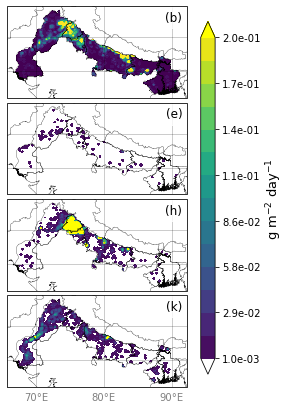

In [10]:
#Plot
lat = fa_e.XLAT[0,0,:,:]
lon  = fa_e.XLONG[0,0,:, :]

savepth="./"
emiplot(lat,lon,fpme_igp.avg_day_emi,fme_igp.avg_day_emi,fae_igp.avg_day_emi,fwe_igp.avg_day_emi,cmap="viridis",vmin=0.001,vmax=0.2, label="g m$^{-2}$ day$^{-1}$", 
        levs=15,delta=1e-2,figsize=[5,7],format="%.1e",save=True, spath=savepth,name="emi_fire",savef='png', dpi=300)

In [11]:
fpm_e

,Array,Chunk
Bytes,16.42 kB,19 B
Shape,"(864,)","(1,)"
Count,2592 Tasks,864 Chunks
Type,|S19,numpy.ndarray
,Array,Chunk
Bytes,65.39 MB,75.68 kB
Shape,"(864, 1, 119, 159)","(1, 1, 119, 159)"
Count,6048 Tasks,864 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [12]:
fpm_e.avg_day_emi.attrs['units']='g m-2 day-1'

In [13]:
def map_2D(dataset, var_name, level=0, mask_values=None,
           title=None, cmap = 'OrRd', coastline=True, borders=True,
           pixels=False, set_vmax=None, levs=10, save=False, format='pdf', dpi=1000):   
    
    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
    import numpy as np
    
    
    # ------------------------- DRAW THE MAP --------------------------------
    # draw map.
    ax = plt.subplot(projection=ccrs.PlateCarree())
 
    # draw meridians and parallels.
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                          linewidth=0.5, color='k', alpha=0.4, linestyle='-')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'gray'}
    gl.ylabel_style = {'size': 10, 'color': 'grey'}


    # draw coastlines and borders.
    if coastline:
        ax.add_feature(cfeature.COASTLINE, lw=0.5)
    if borders:
        ax.add_feature(cfeature.BORDERS, lw=0.5)

   # ------------------------- GET DATA TO PLOT------------------------------
   
    # get variable from dataset.   
    var = dataset[var_name]
      
    # plot data at desired level.
    long = dataset.XLONG.values[0,0, :, :]
    lat = dataset.XLAT.values[0, 0,:, :]
    
    if mask_values is None:
        var_values = var[level, :, :]
    else: 
        var_values= np.ma.masked_where(var[level,:,:].values < mask_values,
                                       var[level,:,:].values) 
   

   # -------------------------  PLOT DATA ----------------------------------
    
    #setting levels for bar plot.
    
    if not set_vmax is None:  # set vmax in the bar to a fixed costumed value (useful to compare consitently different plots).
        vmax=set_vmax  
    else: 
        import math                # Get the max value in the array to plot, and round to the next hundreds.
        max_val =var.values.max()       
        vmax = int(math.ceil(max_val / 100.0)) * 100
    
    vmin=0
    levels = np.linspace(vmin, vmax, levs)  # number of levels for which divide the bar. Customised. 
                                                  
    #plot type: contourf or pcolormesh.
    
    if pixels:
        cs = plt.pcolormesh(long, lat,var_values,
            transform=ccrs.PlateCarree(), cmap =cmap, levels=levels, vmin=vmin, vmax=vmax)
    else:    
        cs = plt.contourf(long, lat, var_values,
            transform=ccrs.PlateCarree(), cmap=cmap, levels=levels, vmin=vmin, vmax=vmax)
    
    # colorbar.
    cbar = plt.colorbar(cs,format='%.1f')
    cbar.set_label(var.units)
    
    #title.
    ax.set_title(title)
    
    #save
    if save:
        plt.savefig( save + '.' + format, format=format, dpi=dpi)
    
    plt.show()

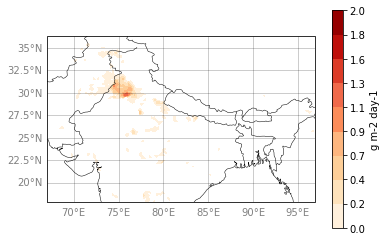

In [14]:
map_2D(fa_e, 'avg_day_emi', level=0, mask_values=0.0001,
           title=None, cmap = 'OrRd', coastline=True, borders=True,
           pixels=False, set_vmax=2, save=False, format='pdf', dpi=1000)